# **UniCEUB - Pós gracuação em Ciência de Dados e Machine Learning - Projeto Final**

Alunas:
- Mariana Ramírez Diaz
- Zelia Santos Porto

Projeto: Sistema de recomendação de jogos com base no perfil do jogador usando a metodologia CRISP-DM

Objetivo: Criar um modelo de aprendizado supervisionado que recomende os 5 jogos mais adequados para um jogador com base em seus dados pessoais e comportamentais, como idade, gênero, frequência de jogo, dispositivos utilizados, gêneros favoritos e motivos para jogar.




**1. Problema de negócio - Business Understanding:**

A indústria de jogos eletrônicos tem se consolidado como um dos setores mais expressivos do mercado global de entretenimento. Com milhares de títulos disponíveis, abrangendo diversos gêneros e estilos, torna-se um desafio para os usuários identificar quais jogos estão mais alinhados às suas preferências pessoais. Este problema é ainda mais evidente para novos jogadores ou usuários com pouca interação prévia em plataformas digitais, situação em que sistemas tradicionais de recomendação baseados em histórico de consumo apresentam baixa efetividade.

Diante desse cenário, propõe-se o desenvolvimento de um sistema de recomendação de jogos eletrônicos que utilize informações demográficas e comportamentais declaradas pelos próprios usuários, a fim de oferecer sugestões personalizadas e coerentes com seus perfis.

Esse tipo de solução pode ser especialmente útil para empresas de jogos, plataformas de streaming interativo, ou serviços de assinatura que desejem oferecer experiências mais individualizadas, atrair novos públicos e fidelizar usuários com sugestões assertivas.

Critérios de sucesso:
- O modelo deve prever corretamente ao menos 3 dos 5 jogos favoritos com base em jogadores similares.
- Geração de recomendações coerentes com os gêneros marcados como preferidos.
- Modelo com acurácia superior a um baseline aleatório.


Recursos disponíveis:
- Dataset de jogadores (Excel)
- API de jogos da Steam
- Ferramentas: Python, Pandas, Scikit-learn, Streamlit ou FastAPI

Riscos e restrições:
- Pequeno volume de dados de entrada
- Possível inconsistência ou subjetividade nas respostas de favoritos
- Dificuldade de mapeamento de jogos favoritos do usuário para jogos válidos da Steam

**2. Entendimento dos dados - Data Understanding**

2.1 Visão geral dos dados

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Importar bibliotecas
import pandas as pd
import requests
import numpy as np

In [6]:
# Carregar os datasets

# Perfil de jogadores
df_jogadores = pd.read_excel("datasets/dataset jogadores.xlsx")

# Perfil de jogos
df_jogos = pd.read_csv("datasets/jogos_steam.csv")

In [7]:
 df_jogadores.head()

,Timestamp,Age,Gender,Location,How often do you play video games?,How many hours do you typically spend gaming in a week?,Which device do you play games on the most?(Check all that apply),What genres of video games do you play? (Check all that apply),What is your favorite game?,How do you discover new games? (Check all that apply),...,Why do you play video games? (Check all that apply),How often do you play video games?,How many hours do you typically spend gaming in a week?,Which device do you play games on the most?(Check all that apply),What genres of video games do you play? (Check all that apply),What is your favorite game?,How do you discover new games? (Check all that apply),Do you prefer single-player or multiplayer games?,"How much do you spend on gaming monthly (including in-game purchases, new games, etc.)?",Why do you play video games? (Check all that apply)
0,2024-10-24 13:09:27.109,18,Male,Bangalore,Daily,10-20 hours,Mobile,Sports,FC MOBILE,"Social Media, Gaming Forums",...,"For fun/entertainment, To relieve stress",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-10-24 13:09:34.343,19,Male,"Hell road , Bangalore",Rarely/Never,0,Mobile,"Puzzle/Strategy, Simulation (e.g., The Sims)",Wukong,Social Media,...,To improve skills/competition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-24 13:23:13.403,19,Male,Bangalore,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",First-Person Shooter (FPS),Call of duty,Gaming Forums,...,For fun/entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-10-24 13:30:42.445,18,Female,Banglore,Rarely/Never,Less than 5 hours,Mobile,Puzzle/Strategy,Subway,Social Media,...,For fun/entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-10-24 13:32:26.815,18,Female,"Banglore, Karnataka",Daily,Less than 5 hours,"PC, Mobile","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,...,"For fun/entertainment, To relieve stress, To s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_jogos.head()

,appid,name,genres,categories
0,10,Counter-Strike,Action,"Multi-player, PvP, Online PvP, Shared/Split Sc..."
1,20,Team Fortress Classic,Action,"Multi-player, PvP, Online PvP, Shared/Split Sc..."
2,30,Day of Defeat,Action,"Multi-player, Camera Comfort, Color Alternativ..."
3,40,Deathmatch Classic,Action,"Multi-player, PvP, Online PvP, Shared/Split Sc..."
4,50,Half-Life: Opposing Force,Action,"Single-player, Multi-player, Custom Volume Con..."


In [9]:
df_jogadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                                                                                      Non-Null Count  Dtype         
---  ------                                                                                      --------------  -----         
 0   Timestamp                                                                                   500 non-null    datetime64[ns]
 1   Age                                                                                         500 non-null    int64         
 2   Gender                                                                                      500 non-null    object        
 3   Location                                                                                    500 non-null    object        
 4     How often do you play video games?                                                        500 non-null    object        

In [10]:
df_jogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   appid       1197 non-null   int64 
 1   name        1197 non-null   object
 2   genres      1161 non-null   object
 3   categories  1153 non-null   object
dtypes: int64(1), object(3)
memory usage: 37.5+ KB


Ambos os conjuntos de dados utilizados são compostos majoritariamente por variáveis categóricas, como gêneros de jogos, dispositivos utilizados e preferências dos usuários.

No dataset de jogadores, foram identificadas colunas duplicadas, provavelmente geradas por falhas na exportação do formulário.

Já no dataset dos jogos, os campos genres e categories apresentam múltiplos valores em formato de texto, separados por vírgulas.

In [11]:
# Manter apenas as primeiras 13 colunas (são as únicas que não estão duplicadas)
df_jogadores = df_jogadores.iloc[:, :13]

# Renomear para nomes mais curtos e práticos
df_jogadores.columns = [
    "timestamp",
    "age",
    "gender",
    "location",
    "frequency",
    "hours_per_week",
    "device",
    "genres",
    "favorite_game",
    "discovery_methods",
    "preference_mode",
    "monthly_spending",
    "motivation"
]

# Remover espaços em colunas categóricas (string)
for col in df_jogadores.select_dtypes(include='object').columns:
    df_jogadores[col] = df_jogadores[col].astype(str).str.strip()


2.2 Análise exploratória e 2.3 Qualidade dos dados

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

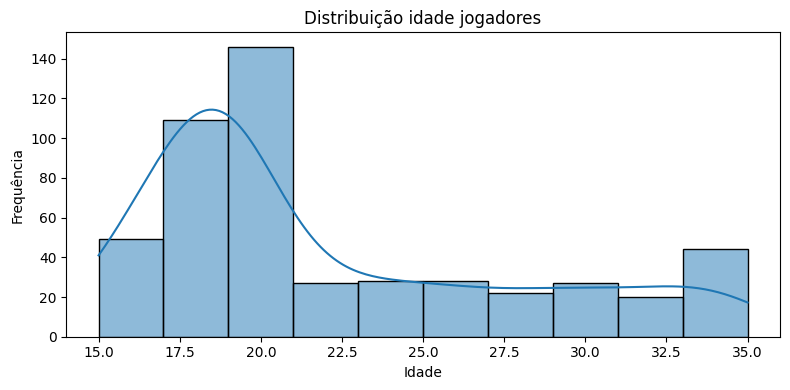

In [13]:
# Distribuição da idade jogadores
plt.figure(figsize=(8, 4))
sns.histplot(df_jogadores["age"], bins=10, kde=True)
plt.title("Distribuição idade jogadores")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

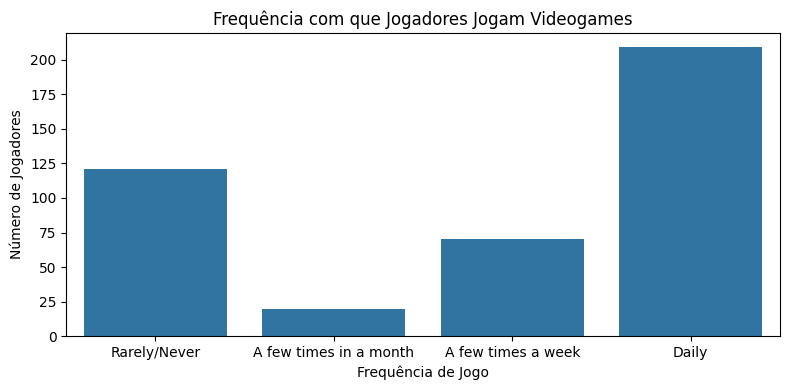

In [14]:
# Distribuição da frequência de jogo

ordem_personalizada = [
    "Rarely/Never",
    "A few times in a month",
    "A few times a week",
    "Daily"
]

plt.figure(figsize=(8, 4))
sns.countplot(data=df_jogadores, x="frequency", order=ordem_personalizada)
plt.title("Frequência com que Jogadores Jogam Videogames")
plt.xlabel("Frequência de Jogo")
plt.ylabel("Número de Jogadores")
plt.tight_layout()
plt.show()

In [15]:
# Olhando o gráfico, é possível converter esses dados categoricos em numericos

Index(['timestamp', 'age', 'gender', 'location', 'frequency', 'hours_per_week',
       'device', 'genres', 'favorite_game', 'discovery_methods',
       'preference_mode', 'monthly_spending', 'motivation'],
      dtype='object')


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrador\AppData\Local\Temp\ipykernel_20908\2361373190.py:6: SyntaxWarning: invalid escape sequence '\s'
  devices_split = df_jogadores["device"].str.split(",\s*")


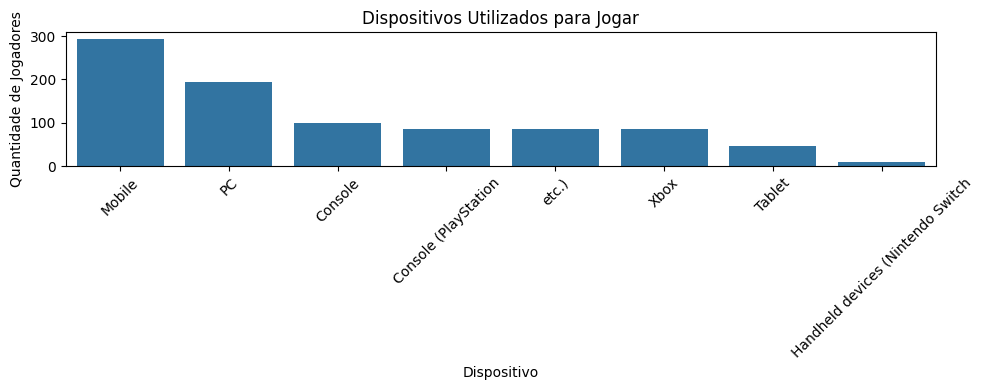

In [16]:
# Import biblioecas
from sklearn.preprocessing import MultiLabelBinarizer

# Separar os dispositivos
print(df_jogadores.columns)
devices_split = df_jogadores["device"].str.split(",\s*")

# Binarizar
mlb_devices = MultiLabelBinarizer()
devices_encoded = pd.DataFrame(
    mlb_devices.fit_transform(devices_split),
    columns=[f"device_{d}" for d in mlb_devices.classes_])

# Concatenar ao DataFrame original
df_jogadores = pd.concat([df_jogadores, devices_encoded], axis=1)

# Dispositivos mais utilizados
dispositivo_cols = [col for col in df_jogadores.columns if col.startswith("device_")]
uso_dispositivos = df_jogadores[dispositivo_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x=uso_dispositivos.index.str.replace("device_", ""), y=uso_dispositivos.values)
plt.title("Dispositivos Utilizados para Jogar")
plt.xlabel("Dispositivo")
plt.ylabel("Quantidade de Jogadores")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrador\AppData\Local\Temp\ipykernel_20908\335445342.py:3: SyntaxWarning: invalid escape sequence '\s'
  genres_split = df_jogadores["genres"].str.split(",\s*")


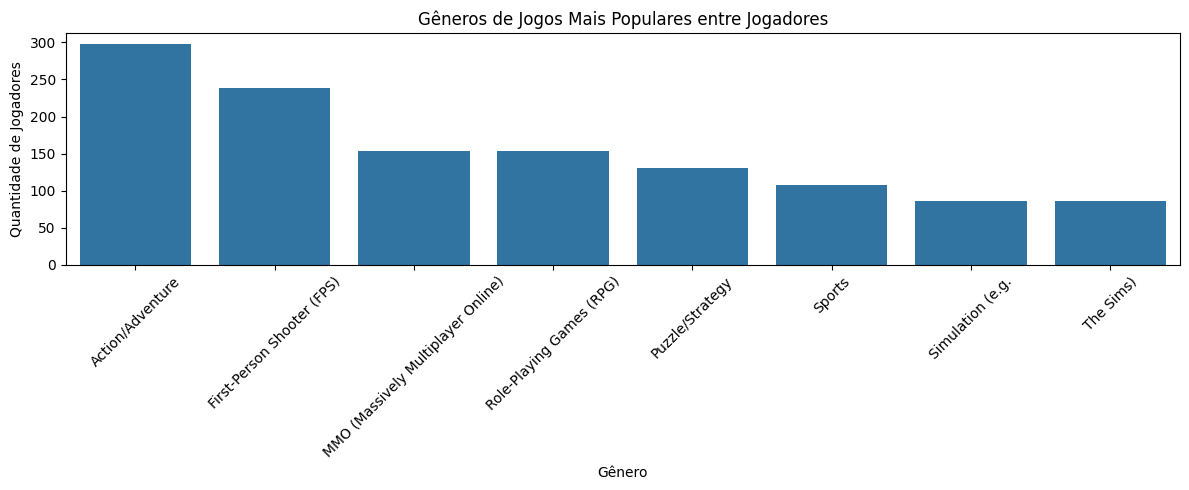

In [17]:
# Gêneros de jogos
# Separar os gêneros da coluna "genres"
genres_split = df_jogadores["genres"].str.split(",\s*")

# Binarizar os gêneros
mlb_genres = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(
    mlb_genres.fit_transform(genres_split),
    columns=mlb_genres.classes_)

# Concatenar com o DataFrame original
df_jogadores = pd.concat([df_jogadores, genres_encoded], axis=1)

# Identificar as colunas de gênero criadas
genero_cols = mlb_genres.classes_

# Somar a quantidade de jogadores por gênero
uso_generos = df_jogadores[genero_cols].sum().sort_values(ascending=False)

# Plotar o gráfico
plt.figure(figsize=(12, 5))
sns.barplot(x=uso_generos.index, y=uso_generos.values)
plt.title("Gêneros de Jogos Mais Populares entre Jogadores")
plt.xlabel("Gênero")
plt.ylabel("Quantidade de Jogadores")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Com base nos gráficos gerados, é possível observar alguns padrões importantes no perfil dos participantes da pesquisa:

A maior parte dos jogadores está na faixa etária entre 15 e 21 anos, o que reflete uma forte presença do público jovem no universo dos videogames.

A frequência mais comum de jogo é diária, indicando um alto nível de engajamento entre os respondentes.

Os dispositivos mais utilizados para jogar são o mobile e o PC, o que sugere uma preferência por plataformas acessíveis e versáteis.

Em relação aos gêneros de jogos preferidos, destacam-se categorias como Action/Adventure, RPG e FPS, evidenciando uma inclinação por jogos envolventes, com narrativa e/ou desafios de habilidade

**3. Preparação dos dados - Data Preparation**





Na etapa anterior, foi realizada a eliminação de colunas duplicadas, originadas possivelmente por falhas na exportação do formulário. Além disso, foram removidos os espaços em excesso nos nomes das colunas e os títulos foram renomeados para termos mais curtos e padronizados, com o objetivo de facilitar a manipulação e análise dos dados - No dataset de jogadores

In [18]:
print(df_jogadores.columns.tolist())

['timestamp', 'age', 'gender', 'location', 'frequency', 'hours_per_week', 'device', 'genres', 'favorite_game', 'discovery_methods', 'preference_mode', 'monthly_spending', 'motivation', 'device_Console', 'device_Console (PlayStation', 'device_Handheld devices (Nintendo Switch', 'device_Mobile', 'device_PC', 'device_Tablet', 'device_Xbox', 'device_etc.)', 'Action/Adventure', 'First-Person Shooter (FPS)', 'MMO (Massively Multiplayer Online)', 'Puzzle/Strategy', 'Role-Playing Games (RPG)', 'Simulation (e.g.', 'Sports', 'The Sims)']


In [19]:
df_jogadores.drop(['location'], axis=1)

,timestamp,age,gender,frequency,hours_per_week,device,genres,favorite_game,discovery_methods,preference_mode,...,device_Xbox,device_etc.),Action/Adventure,First-Person Shooter (FPS),MMO (Massively Multiplayer Online),Puzzle/Strategy,Role-Playing Games (RPG),Simulation (e.g.,Sports,The Sims)
0,2024-10-24 13:09:27.109,18,Male,Daily,10-20 hours,Mobile,Sports,FC MOBILE,"Social Media, Gaming Forums",Both,...,0,0,0,0,0,0,0,0,1,0
1,2024-10-24 13:09:34.343,19,Male,Rarely/Never,0,Mobile,"Puzzle/Strategy, Simulation (e.g., The Sims)",Wukong,Social Media,Single-player,...,0,0,0,0,0,1,0,1,0,1
2,2024-10-24 13:23:13.403,19,Male,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",First-Person Shooter (FPS),Call of duty,Gaming Forums,Multiplayer,...,1,1,0,1,0,0,0,0,0,0
3,2024-10-24 13:30:42.445,18,Female,Rarely/Never,Less than 5 hours,Mobile,Puzzle/Strategy,Subway,Social Media,Both,...,0,0,0,0,0,1,0,0,0,0
4,2024-10-24 13:32:26.815,18,Female,Daily,Less than 5 hours,"PC, Mobile","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,Multiplayer,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-10-25 16:55:00.000,19,Male,Rarely/Never,5-10 hours,PC,Puzzle/Strategy,Subway,Social Media,Both,...,0,0,0,0,0,1,0,0,0,0
496,2024-10-25 16:56:00.000,16,Female,Daily,10-20 hours,"Console (PlayStation, Xbox, etc.)","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,Both,...,1,1,1,1,0,0,1,0,0,0
497,2024-10-25 16:57:00.000,30,Male,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",Sports,Efootball,Social Media,Both,...,1,1,0,0,0,0,0,0,1,0
498,2024-10-25 16:58:00.000,19,Male,Daily,More than 20 hours,PC,"Action/Adventure, First-Person Shooter (FPS), ...",Call of duty,"Social Media, Gaming Forums, Game Reviews/Blog...",Both,...,0,0,1,1,1,0,1,0,0,0


In [20]:
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler

# Dataset dos jogadores:

# Normalizar idade dos jogadores
scaler = MinMaxScaler()
df_jogadores["age_normalized"] = scaler.fit_transform(df_jogadores[["age"]])

# Converter coluna frequência
freq_map = {
    "Rarely/Never": 0,
    "A few times in a month": 1,
    "A few times a week": 2,
    "Daily": 3
}
df_jogadores["frequency_num"] = df_jogadores["frequency"].map(freq_map)

# Converter horas por semana para valor aproximado
def parse_hours(h):
    h = h.lower()
    if "less than" in h:
        return 3
    elif "5-10" in h:
        return 7
    elif "10-20" in h:
        return 15
    elif "more than 20" in h:
        return 25
    elif "30min" in h or "30 min" in h:
        return 0.5
    try:
        return float(h)
    except:
        return np.nan

categoricas_simples = ["gender", "preference_mode"]
df_onehot = pd.get_dummies(df_jogadores[categoricas_simples], prefix=categoricas_simples)

# MultiLabelBinarizer para colunas de múltipla escolha (genres e device já foi binarizado na etapa anterior)
multicolunas = ["discovery_methods", "motivation"]
df_multilabel = []

for col in multicolunas:
    split_col = df_jogadores[col].astype(str).str.split(",\s*")
    mlb = MultiLabelBinarizer()
    encoded = pd.DataFrame(mlb.fit_transform(split_col), columns=[f"{col}_{c}" for c in mlb.classes_])
    df_multilabel.append(encoded)

# Concatenar tudo ao DataFrame original
df_jogadores_final = pd.concat(
    [df_jogadores,
     df_onehot] + df_multilabel,
    axis=1)


<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrador\AppData\Local\Temp\ipykernel_20908\579679140.py:44: SyntaxWarning: invalid escape sequence '\s'
  split_col = df_jogadores[col].astype(str).str.split(",\s*")


In [21]:
df_jogadores.columns[df_jogadores.columns.duplicated()].tolist()

# Remover duplicatas (se por acaso tem)
df_jogadores = df_jogadores.loc[:, ~df_jogadores.columns.duplicated()]


In [22]:
# Remover colunas categóricas originais (object)
colunas_object = df_jogadores.select_dtypes(include='object').columns.tolist()
df_jogadores_final.drop(columns=colunas_object, inplace=True)

In [23]:
df_jogadores_final.drop(columns=["timestamp"], inplace=True)

In [24]:
df_jogadores_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 41 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   age                                                    500 non-null    int64  
 1   device_Console                                         500 non-null    int64  
 2   device_Console (PlayStation                            500 non-null    int64  
 3   device_Handheld devices (Nintendo Switch               500 non-null    int64  
 4   device_Mobile                                          500 non-null    int64  
 5   device_PC                                              500 non-null    int64  
 6   device_Tablet                                          500 non-null    int64  
 7   device_Xbox                                            500 non-null    int64  
 8   device_etc.)                                      

In [25]:
df_jogos.isnull().sum()

appid          0
name           0
genres        36
categories    44
dtype: int64

O dataset dos jogos, apresenta valores nulos, pelo que será necessário tratá-los

In [26]:
# Remover linhas sem gênero ou categoria
df_jogos = df_jogos.dropna(subset=["genres", "categories"])

# Separar múltiplos gêneros e categorias
genres_split = df_jogos["genres"].str.split(",\s*")
categories_split = df_jogos["categories"].str.split(",\s*")

# Codificar gêneros e categorias
mlb_genres = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb_genres.fit_transform(genres_split),
                              columns=[f"genre_{g}" for g in mlb_genres.classes_])

mlb_cats = MultiLabelBinarizer()
cats_encoded = pd.DataFrame(mlb_cats.fit_transform(categories_split),
                            columns=[f"cat_{c}" for c in mlb_cats.classes_])

# Concatenar os vetores ao DataFrame
df_jogos = pd.concat([df_jogos.reset_index(drop=True),
                      genres_encoded.reset_index(drop=True),
                      cats_encoded.reset_index(drop=True)], axis=1)

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrador\AppData\Local\Temp\ipykernel_20908\1747782104.py:5: SyntaxWarning: invalid escape sequence '\s'
  genres_split = df_jogos["genres"].str.split(",\s*")
C:\Users\Administrador\AppData\Local\Temp\ipykernel_20908\1747782104.py:6: SyntaxWarning: invalid escape sequence '\s'
  categories_split = df_jogos["categories"].str.split(",\s*")


In [27]:
df_jogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 97 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   appid                               1152 non-null   int64 
 1   name                                1152 non-null   object
 2   genres                              1152 non-null   object
 3   categories                          1152 non-null   object
 4   genre_Action                        1152 non-null   int64 
 5   genre_Adventure                     1152 non-null   int64 
 6   genre_Animation & Modeling          1152 non-null   int64 
 7   genre_Audio Production              1152 non-null   int64 
 8   genre_Casual                        1152 non-null   int64 
 9   genre_Design & Illustration         1152 non-null   int64 
 10  genre_Early Access                  1152 non-null   int64 
 11  genre_Education                     1152 non-null   int6

**4. Modelação - Modeling**

In [28]:
pip install scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
print(df_jogadores_final.columns)


Index(['age', 'device_Console', 'device_Console (PlayStation',
       'device_Handheld devices (Nintendo Switch', 'device_Mobile',
       'device_PC', 'device_Tablet', 'device_Xbox', 'device_etc.)',
       'Action/Adventure', 'First-Person Shooter (FPS)',
       'MMO (Massively Multiplayer Online)', 'Puzzle/Strategy',
       'Role-Playing Games (RPG)', 'Simulation (e.g.', 'Sports', 'The Sims)',
       'age_normalized', 'frequency_num', 'gender_Female', 'gender_Male',
       'gender_male', 'preference_mode_Both', 'preference_mode_Multiplayer',
       'preference_mode_Single-player',
       'discovery_methods_Friends/Family Recommendations',
       'discovery_methods_Game Reviews/Blogs',
       'discovery_methods_Gaming Forums',
       'discovery_methods_I search myself from playstore',
       'discovery_methods_Social Media',
       'discovery_methods_YouTube/Streaming platforms (Twitch',
       'discovery_methods_etc.)', 'discovery_methods_my own ways!!!',
       'motivation_For fun/en

In [30]:
import pandas as pd

# Depois de tratar os dados...
df_jogadores_final.to_csv("jogadores_tratado.csv", index=False)
df_jogos.to_json("jogos_tratado.json", orient="records")

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

genero_cols = [
    'Action/Adventure', 'First-Person Shooter (FPS)', 'MMO (Massively Multiplayer Online)',
    'Puzzle/Strategy', 'Role-Playing Games (RPG)', 'Simulation (e.g.', 'Sports', 'The Sims)'
]

X = df_jogadores_final.drop(columns=genero_cols)
y = df_jogadores_final[genero_cols]

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar no treino
modelo = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
modelo.fit(X_train, y_train)

# Salvar o modelo e as colunas
joblib.dump(modelo, "modelo_recomendador.pkl")
joblib.dump(X.columns.tolist(), "colunas_modelo.pkl")
joblib.dump(y.columns.tolist(), "genero_cols.pkl")


['genero_cols.pkl']

In [35]:
import joblib
colunas = joblib.load("colunas_modelo.pkl")
print(len(colunas))
print(colunas)

33
['age', 'device_Console', 'device_Console (PlayStation', 'device_Handheld devices (Nintendo Switch', 'device_Mobile', 'device_PC', 'device_Tablet', 'device_Xbox', 'device_etc.)', 'age_normalized', 'frequency_num', 'gender_Female', 'gender_Male', 'gender_male', 'preference_mode_Both', 'preference_mode_Multiplayer', 'preference_mode_Single-player', 'discovery_methods_Friends/Family Recommendations', 'discovery_methods_Game Reviews/Blogs', 'discovery_methods_Gaming Forums', 'discovery_methods_I search myself from playstore', 'discovery_methods_Social Media', 'discovery_methods_YouTube/Streaming platforms (Twitch', 'discovery_methods_etc.)', 'discovery_methods_my own ways!!!', 'motivation_For fun/entertainment', 'motivation_If no other better work', 'motivation_To improve skills/competition', 'motivation_To relieve stress', 'motivation_To socialize', 'motivation_To socialize with friends', 'motivation_etc', "motivation_learning how it's designed"]


**5. Avaliação - Evaluation**

In [38]:
from sklearn.metrics import classification_report, accuracy_score, hamming_loss, roc_auc_score
import numpy as np

# === Previsão ===
y_pred = modelo.predict(X_test)

# 1. Accuracy por rótulo (coluna)
accuracies = [accuracy_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
print("=== Accuracy por Gênero ===")
for i, col in enumerate(genero_cols):
    print(f"{col}: {accuracies[i]:.4f}")
print(f"\nAccuracy Média: {np.mean(accuracies):.4f}\n")

# 2. Classification Report por coluna
print("=== Classification Report por Gênero ===")
for i, col in enumerate(genero_cols):
    print(f"\n--- {col} ---")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))

# 3. Hamming Loss
hamming = hamming_loss(y_test, y_pred)
print(f"\n=== Hamming Loss (quanto menor, melhor): {hamming:.4f}")

# 4. Subset Accuracy
subset_acc = accuracy_score(y_test.values.tolist(), y_pred.tolist())
print(f"\n=== Subset Accuracy (todos os gêneros corretos): {subset_acc:.4f}")

# 5. (Opcional) ROC AUC Score micro/macro
try:
    y_pred_prob = modelo.predict_proba(X_test)
    y_score = np.array([prob[:, 1] for prob in y_pred_prob]).T
    roc_auc_micro = roc_auc_score(y_test, y_score, average='micro')
    roc_auc_macro = roc_auc_score(y_test, y_score, average='macro')
    print(f"\nROC AUC (micro): {roc_auc_micro:.4f}")
    print(f"ROC AUC (macro): {roc_auc_macro:.4f}")
except Exception as e:
    print("\nNão foi possível calcular ROC AUC (possivelmente por dados desbalanceados ou valores únicos).")
    print(f"Erro: {e}")


=== Accuracy por Gênero ===
Action/Adventure: 0.8800
First-Person Shooter (FPS): 0.8700
MMO (Massively Multiplayer Online): 0.8700
Puzzle/Strategy: 0.9200
Role-Playing Games (RPG): 0.9700
Simulation (e.g.: 0.9600
Sports: 0.8800
The Sims): 0.9600

Accuracy Média: 0.9137

=== Classification Report por Gênero ===

--- Action/Adventure ---
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        36
           1       0.91      0.91      0.91        64

    accuracy                           0.88       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.88      0.88       100


--- First-Person Shooter (FPS) ---
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        54
           1       0.92      0.78      0.85        46

    accuracy                           0.87       100
   macro avg       0.88      0.86      0.87       100
weighted avg       0.88    